In [2]:
# import libraries

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib.pyplot import figure

In [3]:
# import data
df = pd.read_csv('ml.csv')
df = df.filter(['NAME', 'TIME W/ CUTS', 'TIME W/O CUTS', 'TIME FIRST ROUND', 'TIME ROOT END'])
df['TIME FIRST ROUND'] = df['TIME W/O CUTS'] + df['TIME FIRST ROUND']
df['TIME ROOT END'] = df['TIME W/O CUTS'] + df['TIME ROOT END']

df = df.groupby('NAME').mean()
df = df.reset_index()
df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END
0,10teams.mps.gz,10.612133,11.890114,13.404720,15.390291
1,22433.mps.gz,2.894854,0.800995,1.023502,3.695817
2,23588.mps.gz,5.013394,2.213224,2.401861,4.316275
3,30_70_45_05_100.mps.gz,303.665869,248.788698,270.814232,408.816634
4,30_70_45_095_100.mps.gz,855.303682,57.034050,80.574401,247.294874
...,...,...,...,...,...
407,uct-subprob.mps.gz,3255.584086,18000.007912,18000.423594,18129.937564
408,umts.mps.gz,1080.299948,13296.497325,13297.545682,13338.914203
409,unitcal_7.mps.gz,1045.198580,13891.858562,13972.179635,14291.122965
410,var-smallemery-m6j6.mps.gz,8376.147344,11757.510814,11850.028256,11852.882986


In [4]:
# create actual labels
time_1 = []
time_2 = []
time_3 = []

for index, row in df.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_1.append(0)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_1.append(1)

    if row['TIME W/ CUTS'] > row['TIME FIRST ROUND']:
        time_2.append(0)
    elif row['TIME W/ CUTS'] <= row['TIME FIRST ROUND']:
        time_2.append(1)
        
    if row['TIME W/ CUTS'] > row['TIME ROOT END']:
        time_3.append(0)
    elif row['TIME W/ CUTS'] <= row['TIME ROOT END']:
        time_3.append(1)

df['Time 1'] = time_1
df['Time 2'] = time_2
df['Time 3'] = time_3

df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,Time 1,Time 2,Time 3
0,10teams.mps.gz,10.612133,11.890114,13.404720,15.390291,1,1,1
1,22433.mps.gz,2.894854,0.800995,1.023502,3.695817,0,0,1
2,23588.mps.gz,5.013394,2.213224,2.401861,4.316275,0,0,0
3,30_70_45_05_100.mps.gz,303.665869,248.788698,270.814232,408.816634,0,0,1
4,30_70_45_095_100.mps.gz,855.303682,57.034050,80.574401,247.294874,0,0,0
...,...,...,...,...,...,...,...,...
407,uct-subprob.mps.gz,3255.584086,18000.007912,18000.423594,18129.937564,1,1,1
408,umts.mps.gz,1080.299948,13296.497325,13297.545682,13338.914203,1,1,1
409,unitcal_7.mps.gz,1045.198580,13891.858562,13972.179635,14291.122965,1,1,1
410,var-smallemery-m6j6.mps.gz,8376.147344,11757.510814,11850.028256,11852.882986,1,1,1


In [5]:
# import predicted label for experiment 1
df_exp_1 = pd.read_csv('experiment_1_combined.csv', index_col=[0])
df_exp_1 = df_exp_1.filter(['NAME', 'PLabel RF'])
df_exp_1 = df_exp_1.sort_values(by = ['NAME'], ascending = True)
df_exp_1.rename(columns ={'PLabel RF':'PLabel 1'}, inplace=True)
df_exp_1

,NAME,PLabel 1
227,10teams.mps.gz,1
381,22433.mps.gz,0
122,23588.mps.gz,0
192,30_70_45_05_100.mps.gz,0
400,30_70_45_095_100.mps.gz,1
...,...,...
61,uct-subprob.mps.gz,1
41,umts.mps.gz,1
173,unitcal_7.mps.gz,1
251,var-smallemery-m6j6.mps.gz,1


In [6]:
# merge the data 
df = df.merge(df_exp_1, on = ['NAME'], how = 'left')
df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,Time 1,Time 2,Time 3,PLabel 1
0,10teams.mps.gz,10.612133,11.890114,13.404720,15.390291,1,1,1,1
1,22433.mps.gz,2.894854,0.800995,1.023502,3.695817,0,0,1,0
2,23588.mps.gz,5.013394,2.213224,2.401861,4.316275,0,0,0,0
3,30_70_45_05_100.mps.gz,303.665869,248.788698,270.814232,408.816634,0,0,1,0
4,30_70_45_095_100.mps.gz,855.303682,57.034050,80.574401,247.294874,0,0,0,1
...,...,...,...,...,...,...,...,...,...
407,uct-subprob.mps.gz,3255.584086,18000.007912,18000.423594,18129.937564,1,1,1,1
408,umts.mps.gz,1080.299948,13296.497325,13297.545682,13338.914203,1,1,1,1
409,unitcal_7.mps.gz,1045.198580,13891.858562,13972.179635,14291.122965,1,1,1,1
410,var-smallemery-m6j6.mps.gz,8376.147344,11757.510814,11850.028256,11852.882986,1,1,1,1


In [7]:
# import predicted label for experiment 2
df_exp_2 = pd.read_csv('experiment_2_combined.csv', index_col=[0])
df_exp_2 = df_exp_2.filter(['NAME', 'PLabel RF'])
df_exp_2 = df_exp_2.sort_values(by = ['NAME'], ascending = True)
df_exp_2.rename(columns ={'PLabel RF':'PLabel 2'}, inplace=True)
df_exp_2

,NAME,PLabel 2
227,10teams.mps.gz,1
381,22433.mps.gz,1
122,23588.mps.gz,0
192,30_70_45_05_100.mps.gz,0
400,30_70_45_095_100.mps.gz,1
...,...,...
61,uct-subprob.mps.gz,1
41,umts.mps.gz,1
173,unitcal_7.mps.gz,1
251,var-smallemery-m6j6.mps.gz,1


In [8]:
# merge the data 
df = df.merge(df_exp_2, on = ['NAME'], how = 'left')
df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2
0,10teams.mps.gz,10.612133,11.890114,13.404720,15.390291,1,1,1,1,1
1,22433.mps.gz,2.894854,0.800995,1.023502,3.695817,0,0,1,0,1
2,23588.mps.gz,5.013394,2.213224,2.401861,4.316275,0,0,0,0,0
3,30_70_45_05_100.mps.gz,303.665869,248.788698,270.814232,408.816634,0,0,1,0,0
4,30_70_45_095_100.mps.gz,855.303682,57.034050,80.574401,247.294874,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
407,uct-subprob.mps.gz,3255.584086,18000.007912,18000.423594,18129.937564,1,1,1,1,1
408,umts.mps.gz,1080.299948,13296.497325,13297.545682,13338.914203,1,1,1,1,1
409,unitcal_7.mps.gz,1045.198580,13891.858562,13972.179635,14291.122965,1,1,1,1,1
410,var-smallemery-m6j6.mps.gz,8376.147344,11757.510814,11850.028256,11852.882986,1,1,1,1,1


In [9]:
# import predicted label for experiment 3
df_exp_3 = pd.read_csv('experiment_3_combined.csv', index_col=[0])
df_exp_3 = df_exp_3.filter(['NAME', 'PLabel RF'])
df_exp_3 = df_exp_3.sort_values(by = ['NAME'], ascending = True)
df_exp_3.rename(columns ={'PLabel RF':'PLabel 3'}, inplace=True)
df_exp_3

,NAME,PLabel 3
227,10teams.mps.gz,1
381,22433.mps.gz,1
122,23588.mps.gz,1
192,30_70_45_05_100.mps.gz,1
400,30_70_45_095_100.mps.gz,1
...,...,...
61,uct-subprob.mps.gz,1
41,umts.mps.gz,1
173,unitcal_7.mps.gz,1
251,var-smallemery-m6j6.mps.gz,1


In [10]:
# merge the data 
df = df.merge(df_exp_3, on = ['NAME'], how = 'left')
df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2,PLabel 3
0,10teams.mps.gz,10.612133,11.890114,13.404720,15.390291,1,1,1,1,1,1
1,22433.mps.gz,2.894854,0.800995,1.023502,3.695817,0,0,1,0,1,1
2,23588.mps.gz,5.013394,2.213224,2.401861,4.316275,0,0,0,0,0,1
3,30_70_45_05_100.mps.gz,303.665869,248.788698,270.814232,408.816634,0,0,1,0,0,1
4,30_70_45_095_100.mps.gz,855.303682,57.034050,80.574401,247.294874,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
407,uct-subprob.mps.gz,3255.584086,18000.007912,18000.423594,18129.937564,1,1,1,1,1,1
408,umts.mps.gz,1080.299948,13296.497325,13297.545682,13338.914203,1,1,1,1,1,1
409,unitcal_7.mps.gz,1045.198580,13891.858562,13972.179635,14291.122965,1,1,1,1,1,1
410,var-smallemery-m6j6.mps.gz,8376.147344,11757.510814,11850.028256,11852.882986,1,1,1,1,1,1


Create Dataframe for all instances and the distribution

In [11]:
# Default
print(len(df[df['Time 1']==1]))
print(len(df[df['Time 1']==0]))

223
189


In [12]:
# Experiment 1

print(len(df[(df['Time 1']==1) & (df['PLabel 1']==1)]))
print(len(df[(df['Time 1']==1) & (df['PLabel 1']==0)]))
print(len(df[(df['Time 1']==0) & (df['PLabel 1']==1)]))
print(len(df[(df['Time 1']==0) & (df['PLabel 1']==0)]))

206
17
21
168


In [13]:
# Experiment 2

print(len(df[(df['Time 2']==1) & (df['PLabel 2']==1)]))
print(len(df[(df['Time 2']==1) & (df['PLabel 2']==0)]))
print(len(df[(df['Time 2']==0) & (df['PLabel 2']==1)]))
print(len(df[(df['Time 2']==0) & (df['PLabel 2']==0)]))

242
13
27
130


In [14]:
# Experiment 3

print(len(df[(df['Time 3']==1) & (df['PLabel 3']==1)]))
print(len(df[(df['Time 3']==1) & (df['PLabel 3']==0)]))
print(len(df[(df['Time 3']==0) & (df['PLabel 3']==1)]))
print(len(df[(df['Time 3']==0) & (df['PLabel 3']==0)]))

289
2
92
29


In [15]:
d = {'Step': ['Default', 'Initial', 'Round 1', 'End of Root'], 'P1T1': [223,206,242,289], 'P0T1': [0,17,13,2], 'P1T0': [189,21,27,92], 'P0T0': [0,168,130,29]}
table = pd.DataFrame(data=d)
table

,Step,P1T1,P0T1,P1T0,P0T0
0,Default,223,0,189,0
1,Initial,206,17,21,168
2,Round 1,242,13,27,130
3,End of Root,289,2,92,29


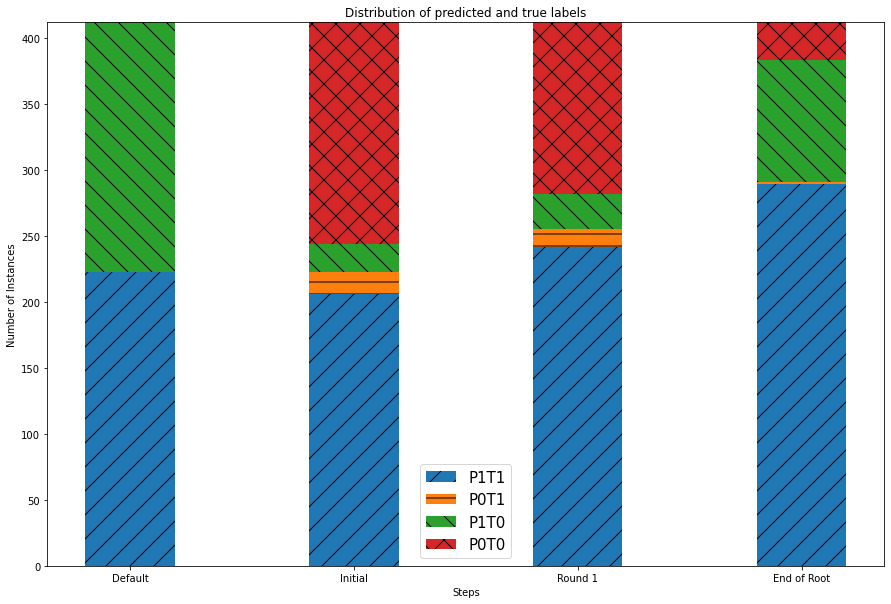

In [16]:
Step = ['Default', 'Initial', 'Round 1', 'End of Root']
P1T1 = [223,206,242,289]
P0T1 = [0,17,13,2]
P1T0 = [189,21,27,92]
P0T0 = [0,168,130,29]

sum_1_2 = np.add(P1T1, P0T1).tolist()
sum_1_2_3 = np.add(sum_1_2, P1T0).tolist()


fig, axes = plt.subplots(figsize=(15,10))

plt.bar(Step, P1T1, hatch = '/', label = 'P1T1', width = 0.4)
plt.bar(Step, P0T1, bottom = P1T1, hatch = '-', label = 'P0T1', width = 0.4)
plt.bar(Step, P1T0, bottom = sum_1_2, hatch = '\\', label = 'P1T0', width = 0.4)
plt.bar(Step, P0T0, bottom = sum_1_2_3, hatch = 'X', label = 'P0T0', width = 0.4)


plt.xlabel('Steps')
plt.ylabel('Number of Instances')
plt.title('Distribution of predicted and true labels')
plt.legend(fontsize = 15)
plt.show()

Testing Data

In [17]:
test = pd.read_csv('experiment_1_test.csv', )
test = test.filter(['NAME'])

In [18]:
test_df = test.merge(df, on = ['NAME'], how = 'left')
test_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2,PLabel 3
0,sorrell3.mps.gz,17329.188580,18000.008912,18018.452137,23904.287422,1,1,1,1,1,1
1,neos-1430701.mps.gz,14.655323,6.074282,6.131878,10.372995,0,0,0,1,1,1
2,neos-4805882-barwon.mps.gz,595.238682,1033.522239,1058.498897,1083.351605,1,1,1,1,1,1
3,p200x1188c.mps.gz,4.135842,3507.467790,3507.535667,3511.603568,1,1,1,1,1,1
4,pigeon-10.mps.gz,15.774715,125.919814,125.979773,126.741377,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
78,nh97_potential.mps.gz,423.882664,59.881896,60.249260,91.085402,0,0,0,1,1,1
79,gfd-schedulen55f2d50m30k3i.mps.gz,17791.473241,18001.918515,18116.353758,29786.418398,1,1,1,0,1,1
80,Test3.mps.gz,8.171018,18.910335,23.627484,27.080499,1,1,1,0,1,1
81,app1-1.mps.gz,8.058875,0.786117,1.367134,8.822929,0,0,1,1,0,1


In [19]:
# Default
print(len(test_df[test_df['Time 1']==1]))
print(len(test_df[test_df['Time 1']==0]))

40
43


In [20]:
# Experiment 1

print(len(test_df[(test_df['Time 1']==1) & (test_df['PLabel 1']==1)]))
print(len(test_df[(test_df['Time 1']==1) & (test_df['PLabel 1']==0)]))
print(len(test_df[(test_df['Time 1']==0) & (test_df['PLabel 1']==1)]))
print(len(test_df[(test_df['Time 1']==0) & (test_df['PLabel 1']==0)]))

23
17
21
22


In [21]:
# Experiment 2

print(len(test_df[(test_df['Time 2']==1) & (test_df['PLabel 2']==1)]))
print(len(test_df[(test_df['Time 2']==1) & (test_df['PLabel 2']==0)]))
print(len(test_df[(test_df['Time 2']==0) & (test_df['PLabel 2']==1)]))
print(len(test_df[(test_df['Time 2']==0) & (test_df['PLabel 2']==0)]))

32
13
25
13


In [22]:
# Experiment 3

print(len(test_df[(test_df['Time 3']==1) & (test_df['PLabel 3']==1)]))
print(len(test_df[(test_df['Time 3']==1) & (test_df['PLabel 3']==0)]))
print(len(test_df[(test_df['Time 3']==0) & (test_df['PLabel 3']==1)]))
print(len(test_df[(test_df['Time 3']==0) & (test_df['PLabel 3']==0)]))

51
2
29
1


In [23]:
d = {'Step': ['Default', 'Initial', 'Round 1', 'End of Root'], 'P1T1': [40,23,32,51], 'P0T1': [0,17,13,2], 'P1T0': [43,21,25,29], 'P0T0': [0,22,13,1]}
table = pd.DataFrame(data=d)
table

,Step,P1T1,P0T1,P1T0,P0T0
0,Default,40,0,43,0
1,Initial,23,17,21,22
2,Round 1,32,13,25,13
3,End of Root,51,2,29,1


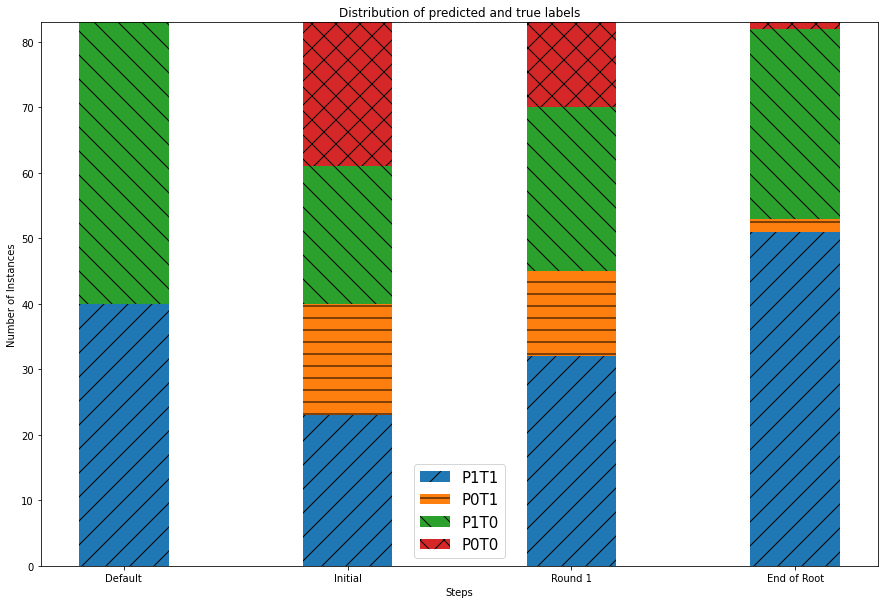

In [24]:
Step = ['Default', 'Initial', 'Round 1', 'End of Root']
P1T1 = [40,23,32,51]
P0T1 = [0,17,13,2]
P1T0 = [43,21,25,29]
P0T0 = [0,22,13,1]



sum_1_2 = np.add(P1T1, P0T1).tolist()
sum_1_2_3 = np.add(sum_1_2, P1T0).tolist()

fig, ax = plt.subplots(figsize=(15,10))

plt.bar(Step, P1T1, hatch = '/', label = 'P1T1', width = 0.4)
plt.bar(Step, P0T1, bottom = P1T1, hatch = '-', label = 'P0T1', width = 0.4)
plt.bar(Step, P1T0, bottom = sum_1_2, hatch = '\\', label = 'P1T0', width = 0.4)
plt.bar(Step, P0T0, bottom = sum_1_2_3, hatch = 'X', label = 'P0T0', width = 0.4)

plt.xlabel('Steps')
plt.ylabel('Number of Instances')
plt.title('Distribution of predicted and true labels')
plt.legend(fontsize = 15)
plt.show()

Training Data

In [25]:
train = pd.read_csv('experiment_1_train.csv', )
train = train.filter(['NAME'])

In [26]:
train_df = train.merge(df, on = ['NAME'], how = 'left')
train_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2,PLabel 3
0,neos6.mps.gz,359.802449,763.751253,771.654364,799.569858,1,1,1,1,1,1
1,air05.mps.gz,57.406171,61.438768,64.319510,70.630537,1,1,1,1,1,1
2,neos8.mps.gz,16.581155,59.514736,76.091711,76.095024,1,1,1,1,1,1
3,mine-166-5.mps.gz,50.761649,13.176230,15.716819,52.546246,0,0,1,0,0,1
4,acc-tight4.mps.gz,229.533662,127.543186,139.248323,159.706961,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
324,nursesched-sprint02.mps.gz,38.106146,348.142076,351.452504,378.415934,1,1,1,1,1,1
325,neos-3209519-ruhr.mps.gz,810.567748,1904.003372,1947.195942,2002.072652,1,1,1,1,1,1
326,k1mushroom.mps.gz,2490.722604,2270.278618,4357.016712,4761.001186,0,1,1,0,1,1
327,cbs-cta.mps.gz,39.827878,60.286328,64.429145,100.114005,1,1,1,1,1,1


In [27]:
# Default
print(len(train_df[train_df['Time 1']==1]))
print(len(train_df[train_df['Time 1']==0]))

183
146


In [28]:
# Experiment 1

print(len(train_df[(train_df['Time 1']==1) & (train_df['PLabel 1']==1)]))
print(len(train_df[(train_df['Time 1']==1) & (train_df['PLabel 1']==0)]))
print(len(train_df[(train_df['Time 1']==0) & (train_df['PLabel 1']==1)]))
print(len(train_df[(train_df['Time 1']==0) & (train_df['PLabel 1']==0)]))

183
0
0
146


In [29]:
# Experiment 2

print(len(train_df[(train_df['Time 2']==1) & (train_df['PLabel 2']==1)]))
print(len(train_df[(train_df['Time 2']==1) & (train_df['PLabel 2']==0)]))
print(len(train_df[(train_df['Time 2']==0) & (train_df['PLabel 2']==1)]))
print(len(train_df[(train_df['Time 2']==0) & (train_df['PLabel 2']==0)]))

210
0
2
117


In [30]:
# Experiment 3

print(len(train_df[(train_df['Time 3']==1) & (train_df['PLabel 3']==1)]))
print(len(train_df[(train_df['Time 3']==1) & (train_df['PLabel 3']==0)]))
print(len(train_df[(train_df['Time 3']==0) & (train_df['PLabel 3']==1)]))
print(len(train_df[(train_df['Time 3']==0) & (train_df['PLabel 3']==0)]))

238
0
63
28


In [31]:
d = {'Step': ['Default', 'Initial', 'Round 1', 'End of Root'], 'P1T1': [183,183,210,238], 'P0T1': [0,0,0,0], 'P1T0': [146,0,2,63], 'P0T0': [0,146,117,28]}
new_df = pd.DataFrame(data=d)
new_df

,Step,P1T1,P0T1,P1T0,P0T0
0,Default,183,0,146,0
1,Initial,183,0,0,146
2,Round 1,210,0,2,117
3,End of Root,238,0,63,28


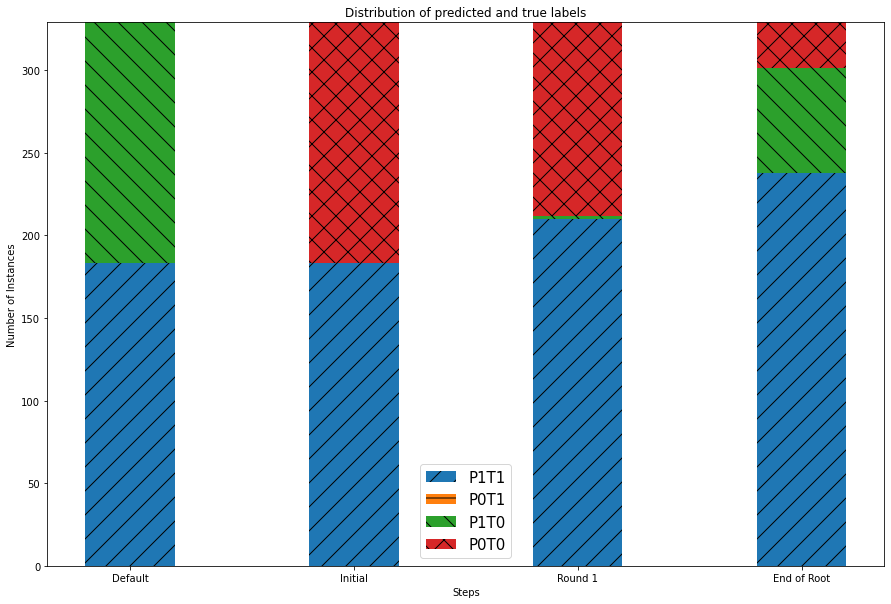

In [32]:
Step = ['Default', 'Initial', 'Round 1', 'End of Root']
P1T1 = [183,183,210,238]
P0T1 = [0,0,0,0]
P1T0 = [146,0,2,63]
P0T0 = [0,146,117,28]

sum_1_2 = np.add(P1T1, P0T1).tolist()
sum_1_2_3 = np.add(sum_1_2, P1T0).tolist()


fig, ax = plt.subplots(figsize=(15,10))

plt.bar(Step, P1T1, hatch = '/', label = 'P1T1', width = 0.4)
plt.bar(Step, P0T1, bottom = P1T1, hatch = '-', label = 'P0T1', width = 0.4)
plt.bar(Step, P1T0, bottom = sum_1_2, hatch = '\\', label = 'P1T0', width = 0.4)
plt.bar(Step, P0T0, bottom = sum_1_2_3, hatch = 'X', label = 'P0T0', width = 0.4)


plt.xlabel('Steps')
plt.ylabel('Number of Instances')
plt.title('Distribution of predicted and true labels')
plt.legend(fontsize = 15)
plt.show()

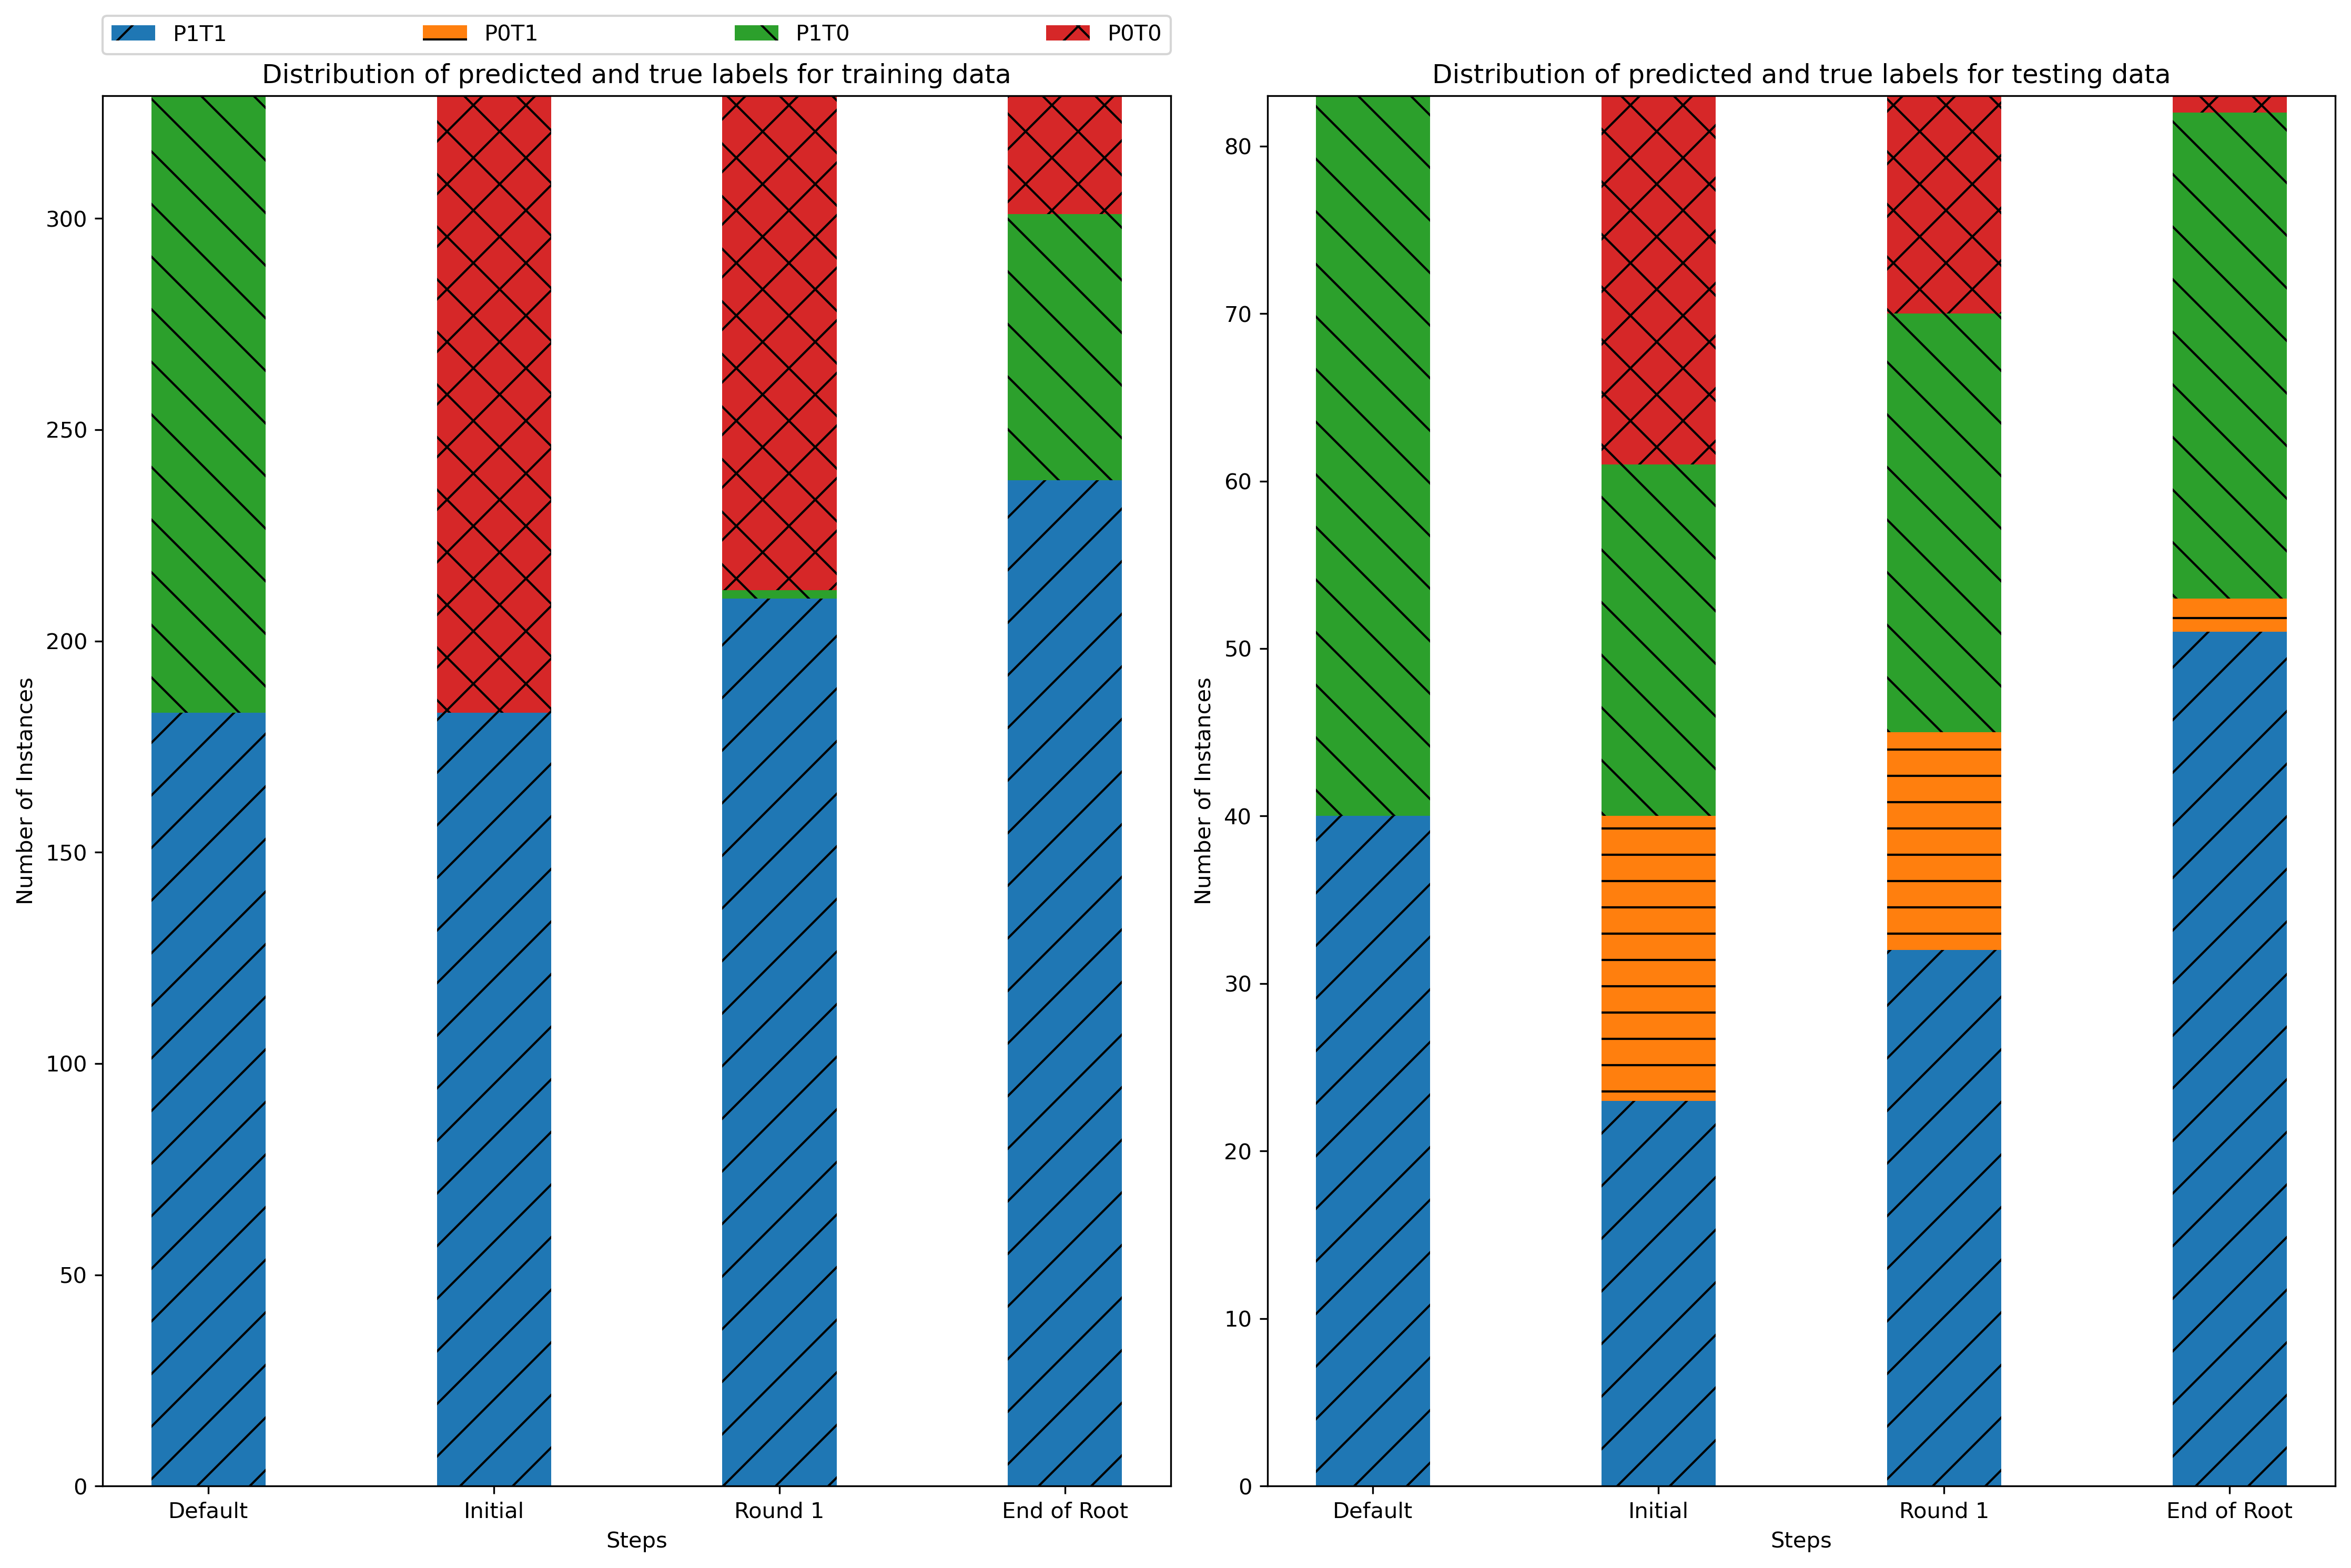

In [52]:
Step = ['Default', 'Initial', 'Round 1', 'End of Root']
P1T1 = [183,183,210,238]
P0T1 = [0,0,0,0]
P1T0 = [146,0,2,63]
P0T0 = [0,146,117,28]


fig = plt.figure(figsize=(15, 10), dpi = 300)
# figure(figsize=(15, 10), dpi = 300)
plt.subplot(1,2,1)


sum_1_2 = np.add(P1T1, P0T1).tolist()
sum_1_2_3 = np.add(sum_1_2, P1T0).tolist()
# fig, ax = plt.subplots(1,2,figsize=(15,10))
plt.bar(Step, P1T1, hatch = '/', label = 'P1T1', width = 0.4)
plt.bar(Step, P0T1, bottom = P1T1, hatch = '-', label = 'P0T1', width = 0.4)
plt.bar(Step, P1T0, bottom = sum_1_2, hatch = '\\', label = 'P1T0', width = 0.4)
plt.bar(Step, P0T0, bottom = sum_1_2_3, hatch = 'X', label = 'P0T0', width = 0.4)


plt.xlabel('Steps')
plt.ylabel('Number of Instances')
plt.title('Distribution of predicted and true labels for training data')

plt.legend(bbox_to_anchor=(0, 1.03, 1, 0.2), loc="lower center", mode="expand", borderaxespad=0, ncol=4)
plt.subplot(1,2,2)

Step = ['Default', 'Initial', 'Round 1', 'End of Root']
P1T1 = [40,23,32,51]
P0T1 = [0,17,13,2]
P1T0 = [43,21,25,29]
P0T0 = [0,22,13,1]


sum_1_2 = np.add(P1T1, P0T1).tolist()
sum_1_2_3 = np.add(sum_1_2, P1T0).tolist()
# fig, ax = plt.subplots(1,2,figsize=(15,10))
plt.bar(Step, P1T1, hatch = '/', label = 'P1T1', width = 0.4)
plt.bar(Step, P0T1, bottom = P1T1, hatch = '-', label = 'P0T1', width = 0.4)
plt.bar(Step, P1T0, bottom = sum_1_2, hatch = '\\', label = 'P1T0', width = 0.4)
plt.bar(Step, P0T0, bottom = sum_1_2_3, hatch = 'X', label = 'P0T0', width = 0.4)

plt.xlabel('Steps')
plt.ylabel('Number of Instances')
plt.title('Distribution of predicted and true labels for testing data')



plt.tight_layout()
plt.show()

fname = "stacked_barplot"
fig.savefig(fname, dpi=300)